<a href="https://colab.research.google.com/github/poojan-dalal/Fresh-rotten-fruit-classifier/blob/neural-network-edits/fruit_clasifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
import os
import zipfile
import random
import shutil
from shutil import copyfile
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
import torch
import torchvision
import cv2

%matplotlib inline
np.random.seed(1)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/drive/MyDrive/NEW DATASET.zip')
zip_file.extractall('/tmp/')

In [ ]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [ ]:
try:
    base_dir = '/tmp'
    fruit_dir = make_dir(os.path.join(base_dir, 'fvm-dataset'))
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))
    preview_dir = make_dir(os.path.join(fruit_dir, 'preview'))

    train_fresh_apples_dir = make_dir(os.path.join(train_dir, 'Fresh Apples'))
    train_rotten_apples_dir = make_dir(os.path.join(train_dir, 'Rotten Apples'))
    train_fresh_banana_dir = make_dir(os.path.join(train_dir, 'Fresh Bananas'))
    train_rotten_banana_dir = make_dir(os.path.join(train_dir, 'Rotten Bananas'))
    train_fresh_bellpepper_dir = make_dir(os.path.join(train_dir, 'Fresh Bellpepper'))
    train_rotten_bellpepper_dir = make_dir(os.path.join(train_dir, 'Rotten Bellpepper'))
    train_fresh_cucumber_dir = make_dir(os.path.join(train_dir, 'Fresh Cucumber'))
    train_rotten_cucumber_dir = make_dir(os.path.join(train_dir, 'Rotten Cucumber'))
    train_fresh_mango_dir = make_dir(os.path.join(train_dir, 'Fresh Mango'))
    train_rotten_mango_dir = make_dir(os.path.join(train_dir, 'Rotten Mango'))
    train_fresh_meat_dir = make_dir(os.path.join(train_dir, 'Fresh Meat'))
    train_rotten_meat_dir = make_dir(os.path.join(train_dir, 'Rotten Meat'))
    train_fresh_orange_dir = make_dir(os.path.join(train_dir, 'Fresh Orange'))
    train_rotten_orange_dir = make_dir(os.path.join(train_dir, 'Rotten Orange'))
    train_fresh_potato_dir = make_dir(os.path.join(train_dir, 'Fresh Potato'))
    train_rotten_potato_dir = make_dir(os.path.join(train_dir, 'Rotten Potato'))
    train_fresh_strawberry_dir = make_dir(os.path.join(train_dir, 'Fresh Strawberry'))
    train_rotten_strawberry_dir = make_dir(os.path.join(train_dir, 'Rotten Strawberry'))
    train_fresh_tomato_dir = make_dir(os.path.join(train_dir, 'Fresh Tomato'))
    train_rotten_tomato_dir = make_dir(os.path.join(train_dir, 'Rotten Tomato'))

    validation_fresh_apples_dir = make_dir(os.path.join(validation_dir, 'Fresh Apples'))
    validation_rotten_apples_dir = make_dir(os.path.join(validation_dir, 'Rotten Apples'))
    validation_fresh_banana_dir = make_dir(os.path.join(validation_dir, 'Fresh Bananas'))
    validation_rotten_banana_dir = make_dir(os.path.join(validation_dir, 'Rotten Bananas'))
    validation_fresh_bellpepper_dir = make_dir(os.path.join(validation_dir, 'Fresh Bellpepper'))
    validation_rotten_bellpepper_dir = make_dir(os.path.join(validation_dir, 'Rotten Bellpepper'))
    validation_fresh_cucumber_dir = make_dir(os.path.join(validation_dir, 'Fresh Cucumber'))
    validation_rotten_cucumber_dir = make_dir(os.path.join(validation_dir, 'Rotten Cucumber'))
    validation_fresh_mango_dir = make_dir(os.path.join(validation_dir, 'Fresh Mango'))
    validation_rotten_mango_dir = make_dir(os.path.join(validation_dir, 'Rotten Mango'))
    validation_fresh_meat_dir = make_dir(os.path.join(validation_dir, 'Fresh Meat'))
    validation_rotten_meat_dir = make_dir(os.path.join(validation_dir, 'Rotten Meat'))
    validation_fresh_orange_dir = make_dir(os.path.join(validation_dir, 'Fresh Orange'))
    validation_rotten_orange_dir = make_dir(os.path.join(validation_dir, 'Rotten Orange'))
    validation_fresh_potato_dir = make_dir(os.path.join(validation_dir, 'Fresh Potato'))
    validation_rotten_potato_dir = make_dir(os.path.join(validation_dir, 'Rotten Potato'))
    validation_fresh_strawberry_dir = make_dir(os.path.join(validation_dir, 'Fresh Strawberry'))
    validation_rotten_strawberry_dir = make_dir(os.path.join(validation_dir, 'Rotten Strawberry'))
    validation_fresh_tomato_dir = make_dir(os.path.join(validation_dir, 'Fresh Tomato'))
    validation_rotten_tomato_dir = make_dir(os.path.join(validation_dir, 'Rotten Tomato'))

    test_fresh_apples_dir = make_dir(os.path.join(test_dir, 'Fresh Apples'))
    test_rotten_apples_dir = make_dir(os.path.join(test_dir, 'Rotten Apples'))
    test_fresh_banana_dir = make_dir(os.path.join(test_dir, 'Fresh Bananas'))
    test_rotten_banana_dir = make_dir(os.path.join(test_dir, 'Rotten Bananas'))
    test_fresh_bellpepper_dir = make_dir(os.path.join(test_dir, 'Fresh Bellpepper'))
    test_rotten_bellpepper_dir = make_dir(os.path.join(test_dir, 'Rotten Bellpepper'))
    test_fresh_cucumber_dir = make_dir(os.path.join(test_dir, 'Fresh Cucumber'))
    test_rotten_cucumber_dir = make_dir(os.path.join(test_dir, 'Rotten Cucumber'))
    test_fresh_mango_dir = make_dir(os.path.join(test_dir, 'Fresh Mango'))
    test_rotten_mango_dir = make_dir(os.path.join(test_dir, 'Rotten Mango'))
    test_fresh_meat_dir = make_dir(os.path.join(test_dir, 'Fresh Meat'))
    test_rotten_meat_dir = make_dir(os.path.join(test_dir, 'Rotten Meat'))
    test_fresh_orange_dir = make_dir(os.path.join(test_dir, 'Fresh Orange'))
    test_rotten_orange_dir = make_dir(os.path.join(test_dir, 'Rotten Orange'))
    test_fresh_potato_dir = make_dir(os.path.join(test_dir, 'Fresh Potato'))
    test_rotten_potato_dir = make_dir(os.path.join(test_dir, 'Rotten Potato'))
    test_fresh_strawberry_dir = make_dir(os.path.join(test_dir, 'Fresh Strawberry'))
    test_rotten_strawberry_dir = make_dir(os.path.join(test_dir, 'Rotten Strawberry'))
    test_fresh_tomato_dir = make_dir(os.path.join(test_dir, 'Fresh Tomato'))
    test_rotten_tomato_dir = make_dir(os.path.join(test_dir, 'Rotten Tomato'))

except OSError:
    pass

In [ ]:
from PIL import Image

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))
        # img = Image.open(os.path.join(TRAINING, filename)).convert('L')
        # img.save(os.path.join(TRAINING, filename))
      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))
        # img = Image.open(os.path.join(VALIDATION, filename)).convert('L')
        # img.save(os.path.join(VALIDATION, filename))

In [ ]:
dataset_train_dir = '/tmp/NEW DATASET/Train'
dataset_test_dir = '/tmp/NEW DATASET/Test'

fapples_train_dir = os.path.join(dataset_train_dir, 'FreshApples')
fbananas_train_dir = os.path.join(dataset_train_dir, 'FreshBanana')
fbellpepper_train_dir = os.path.join(dataset_train_dir, 'FreshBellpepper')
fcucumber_train_dir = os.path.join(dataset_train_dir, 'FreshCucumber')
fmango_train_dir = os.path.join(dataset_train_dir, 'FreshMango')
fmeat_train_dir = os.path.join(dataset_train_dir, 'FreshMeat')
forange_train_dir = os.path.join(dataset_train_dir, 'FreshOranges')
fpotato_train_dir = os.path.join(dataset_train_dir, 'FreshPotato')
fstrawberry_train_dir = os.path.join(dataset_train_dir, 'FreshStrawberry')
ftomato_train_dir = os.path.join(dataset_train_dir, 'FreshTomato')
rapples_train_dir = os.path.join(dataset_train_dir, 'RottenApples')
rbananas_train_dir = os.path.join(dataset_train_dir, 'RottenBanana')
rbellpepper_train_dir = os.path.join(dataset_train_dir, 'RottenBellpepper')
rcucumber_train_dir = os.path.join(dataset_train_dir, 'RottenCucumber')
rmango_train_dir = os.path.join(dataset_train_dir, 'RottenMango')
rmeat_train_dir = os.path.join(dataset_train_dir, 'RottenMeat')
rorange_train_dir = os.path.join(dataset_train_dir, 'RottenOranges')
rpotato_train_dir = os.path.join(dataset_train_dir, 'RottenPotato')
rstrawberry_train_dir = os.path.join(dataset_train_dir, 'RottenStrawberry')
rtomato_train_dir = os.path.join(dataset_train_dir, 'RottenTomato')

fapples_test_dir = os.path.join(dataset_test_dir, 'FreshApples')
fbananas_test_dir = os.path.join(dataset_test_dir, 'FreshBanana')
fbellpepper_test_dir = os.path.join(dataset_test_dir, 'FreshBellpepper')
fcucumber_test_dir = os.path.join(dataset_test_dir, 'FreshCucumber')
fmango_test_dir = os.path.join(dataset_test_dir, 'FreshMango')
fmeat_test_dir = os.path.join(dataset_test_dir, 'FreshMeat')
forange_test_dir = os.path.join(dataset_test_dir, 'FreshOranges')
fpotato_test_dir = os.path.join(dataset_test_dir, 'FreshPotato')
fstrawberry_test_dir = os.path.join(dataset_test_dir, 'FreshStrawberry')
ftomato_test_dir = os.path.join(dataset_test_dir, 'FreshTomato')
rapples_test_dir = os.path.join(dataset_test_dir, 'RottenApples')
rbananas_test_dir = os.path.join(dataset_test_dir, 'RottenBanana')
rbellpepper_test_dir = os.path.join(dataset_test_dir, 'RottenBellpepper')
rcucumber_test_dir = os.path.join(dataset_test_dir, 'RottenCucumber')
rmango_test_dir = os.path.join(dataset_test_dir, 'RottenMango')
rmeat_test_dir = os.path.join(dataset_test_dir, 'RottenMeat')
rorange_test_dir = os.path.join(dataset_test_dir, 'RottenOranges')
rpotato_test_dir = os.path.join(dataset_test_dir, 'RottenPotato')
rstrawberry_test_dir = os.path.join(dataset_test_dir, 'RottenStrawberry')
rtomato_test_dir = os.path.join(dataset_test_dir, 'RottenTomato')

print('fapples_train images = ', len(os.listdir(fapples_train_dir)))
print('fbananas_train images = ', len(os.listdir(fbananas_train_dir)))
print('fbellpepper_train images = ', len(os.listdir(fbellpepper_train_dir)))
print('fcucumber_train images = ', len(os.listdir(fcucumber_train_dir)))
print('fmango_train images = ', len(os.listdir(fmango_train_dir)))
print('fmeat_train images = ', len(os.listdir(fmeat_train_dir)))
print('forange_train images = ', len(os.listdir(forange_train_dir)))
print('fpotato_train images = ', len(os.listdir(fpotato_train_dir)))
print('fstrawberry_train images = ', len(os.listdir(fstrawberry_train_dir)))
print('ftomato_train images = ', len(os.listdir(ftomato_train_dir)))
print('rapples_train images = ', len(os.listdir(rapples_train_dir)))
print('rbananas_train images = ', len(os.listdir(rbananas_train_dir)))
print('rbellpepper_train images = ', len(os.listdir(rbellpepper_train_dir)))
print('rcucumber_train images = ', len(os.listdir(rcucumber_train_dir)))
print('rmango_train images = ', len(os.listdir(rmango_train_dir)))
print('rmeat_train images = ', len(os.listdir(rmeat_train_dir)))
print('rorange_train images = ', len(os.listdir(rorange_train_dir)))
print('rpotato_train images = ', len(os.listdir(rpotato_train_dir)))
print('rstrawberry_train images = ', len(os.listdir(rstrawberry_train_dir)))
print('rtomato_train images = ', len(os.listdir(rtomato_train_dir)))
print()
print('fapples_test images = ', len(os.listdir(fapples_test_dir)))
print('fbananas_test images = ', len(os.listdir(fbananas_test_dir)))
print('fbellpepper_test images = ', len(os.listdir(fbellpepper_test_dir)))
print('fcucumber_test images = ', len(os.listdir(fcucumber_test_dir)))
print('fmango_test images = ', len(os.listdir(fmango_test_dir)))
print('fmeat_test images = ', len(os.listdir(fmeat_test_dir)))
print('forange_test images = ', len(os.listdir(forange_test_dir)))
print('fpotato_test images = ', len(os.listdir(fpotato_test_dir)))
print('fstrawberry_test images = ', len(os.listdir(fstrawberry_test_dir)))
print('ftomato_test images = ', len(os.listdir(ftomato_test_dir)))
print('rapples_test images = ', len(os.listdir(rapples_test_dir)))
print('rbananas_test images = ', len(os.listdir(rbananas_test_dir)))
print('rbellpepper_test images = ', len(os.listdir(rbellpepper_test_dir)))
print('rcucumber_test images = ', len(os.listdir(rcucumber_test_dir)))
print('rmango_test images = ', len(os.listdir(rmango_test_dir)))
print('rmeat_test images = ', len(os.listdir(rmeat_test_dir)))
print('rorange_test images = ', len(os.listdir(rorange_test_dir)))
print('rpotato_test images = ', len(os.listdir(rpotato_test_dir)))
print('rstrawberry_test images = ', len(os.listdir(rstrawberry_test_dir)))
print('rtomato_test images = ', len(os.listdir(rtomato_test_dir)))

fapples_train images =  1537
fbananas_train images =  1202
fbellpepper_train images =  100
fcucumber_train images =  250
fmango_train images =  423
fmeat_train images =  250
forange_train images =  250
fpotato_train images =  251
fstrawberry_train images =  250
ftomato_train images =  120
rapples_train images =  2027
rbananas_train images =  2237
rbellpepper_train images =  250
rcucumber_train images =  250
rmango_train images =  250
rmeat_train images =  250
rorange_train images =  1599
rpotato_train images =  251
rstrawberry_train images =  250
rtomato_train images =  159

fapples_test images =  395
fbananas_test images =  381
fbellpepper_test images =  72
fcucumber_test images =  62
fmango_test images =  61
fmeat_test images =  393
forange_test images =  388
fpotato_test images =  62
fstrawberry_test images =  61
ftomato_test images =  62
rapples_test images =  601
rbananas_test images =  530
rbellpepper_test images =  60
rcucumber_test images =  60
rmango_test images =  60
rmeat_te

In [ ]:
SPLIT_SIZE = 0.67
split_data(fapples_train_dir, train_fresh_apples_dir, validation_fresh_apples_dir, SPLIT_SIZE)
split_data(fbananas_train_dir, train_fresh_banana_dir, validation_fresh_banana_dir, SPLIT_SIZE)
split_data(fbellpepper_train_dir, train_fresh_bellpepper_dir, validation_fresh_bellpepper_dir, SPLIT_SIZE)
split_data(fcucumber_train_dir, train_fresh_cucumber_dir, validation_fresh_cucumber_dir, SPLIT_SIZE)
split_data(fmango_train_dir, train_fresh_mango_dir, validation_fresh_mango_dir, SPLIT_SIZE)
split_data(fmeat_train_dir, train_fresh_meat_dir, validation_fresh_meat_dir, SPLIT_SIZE)
split_data(forange_train_dir, train_fresh_orange_dir, validation_fresh_orange_dir, SPLIT_SIZE)
split_data(fpotato_train_dir, train_fresh_potato_dir, validation_fresh_potato_dir, SPLIT_SIZE)
split_data(fstrawberry_train_dir, train_fresh_strawberry_dir, validation_fresh_strawberry_dir, SPLIT_SIZE)
split_data(ftomato_train_dir, train_fresh_tomato_dir, validation_fresh_tomato_dir, SPLIT_SIZE)
split_data(rapples_train_dir, train_rotten_apples_dir, validation_rotten_apples_dir, SPLIT_SIZE)
split_data(rbananas_train_dir, train_rotten_banana_dir, validation_rotten_banana_dir, SPLIT_SIZE)
split_data(rbellpepper_train_dir, train_rotten_bellpepper_dir, validation_rotten_bellpepper_dir, SPLIT_SIZE)
split_data(rcucumber_train_dir, train_rotten_cucumber_dir, validation_rotten_cucumber_dir, SPLIT_SIZE)
split_data(rmango_train_dir, train_rotten_mango_dir, validation_rotten_mango_dir, SPLIT_SIZE)
split_data(rmeat_train_dir, train_rotten_meat_dir, validation_rotten_meat_dir, SPLIT_SIZE)
split_data(rorange_train_dir, train_rotten_orange_dir, validation_rotten_orange_dir, SPLIT_SIZE)
split_data(rpotato_train_dir, train_rotten_potato_dir, validation_rotten_potato_dir, SPLIT_SIZE)
split_data(rstrawberry_train_dir, train_rotten_strawberry_dir, validation_rotten_strawberry_dir, SPLIT_SIZE)
split_data(rtomato_train_dir, train_rotten_tomato_dir, validation_rotten_tomato_dir, SPLIT_SIZE)

SPLIT_SIZE = 1.0
split_data(fapples_test_dir, test_fresh_apples_dir, validation_fresh_apples_dir, SPLIT_SIZE)
split_data(fbananas_test_dir, test_fresh_banana_dir, validation_fresh_banana_dir, SPLIT_SIZE)
split_data(fbellpepper_test_dir, test_fresh_bellpepper_dir, validation_fresh_bellpepper_dir, SPLIT_SIZE)
split_data(fcucumber_test_dir, test_fresh_cucumber_dir, validation_fresh_cucumber_dir, SPLIT_SIZE)
split_data(fmango_test_dir, test_fresh_mango_dir, validation_fresh_mango_dir, SPLIT_SIZE)
split_data(fmeat_test_dir, test_fresh_meat_dir, validation_fresh_meat_dir, SPLIT_SIZE)
split_data(forange_test_dir, test_fresh_orange_dir, validation_fresh_orange_dir, SPLIT_SIZE)
split_data(fpotato_test_dir, test_fresh_potato_dir, validation_fresh_potato_dir, SPLIT_SIZE)
split_data(fstrawberry_test_dir, test_fresh_strawberry_dir, validation_fresh_strawberry_dir, SPLIT_SIZE)
split_data(ftomato_test_dir, test_fresh_tomato_dir, validation_fresh_tomato_dir, SPLIT_SIZE)
split_data(rapples_test_dir, test_rotten_apples_dir, validation_rotten_apples_dir, SPLIT_SIZE)
split_data(rbananas_test_dir, test_rotten_banana_dir, validation_rotten_banana_dir, SPLIT_SIZE)
split_data(rbellpepper_test_dir, test_rotten_bellpepper_dir, validation_rotten_bellpepper_dir, SPLIT_SIZE)
split_data(rcucumber_test_dir, test_rotten_cucumber_dir, validation_rotten_cucumber_dir, SPLIT_SIZE)
split_data(rmango_test_dir, test_rotten_mango_dir, validation_rotten_mango_dir, SPLIT_SIZE)
split_data(rmeat_test_dir, test_rotten_meat_dir, validation_rotten_meat_dir, SPLIT_SIZE)
split_data(rorange_test_dir, test_rotten_orange_dir, validation_rotten_orange_dir, SPLIT_SIZE)
split_data(rpotato_test_dir, test_rotten_potato_dir, validation_rotten_potato_dir, SPLIT_SIZE)
split_data(rstrawberry_test_dir, test_rotten_strawberry_dir, validation_rotten_strawberry_dir, SPLIT_SIZE)
split_data(rtomato_test_dir, test_rotten_tomato_dir, validation_rotten_tomato_dir, SPLIT_SIZE)

In [ ]:
print(len(os.listdir('/tmp/fvm-dataset/train/Fresh Apples/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Fresh Bananas/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Fresh Bellpepper/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Fresh Cucumber/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Fresh Mango/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Fresh Meat/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Fresh Orange/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Fresh Potato/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Fresh Strawberry/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Fresh Tomato/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Rotten Apples/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Rotten Bananas/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Rotten Bellpepper/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Rotten Cucumber/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Rotten Mango/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Rotten Meat/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Rotten Orange/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Rotten Potato/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Rotten Strawberry/')))
print(len(os.listdir('/tmp/fvm-dataset/train/Rotten Tomato/')))
print()
print(len(os.listdir('/tmp/fvm-dataset/val/Fresh Apples/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Fresh Bananas/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Fresh Bellpepper/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Fresh Cucumber/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Fresh Mango/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Fresh Meat/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Fresh Orange/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Fresh Potato/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Fresh Strawberry/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Fresh Tomato/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Rotten Apples/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Rotten Bananas/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Rotten Bellpepper/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Rotten Cucumber/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Rotten Mango/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Rotten Meat/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Rotten Orange/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Rotten Potato/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Rotten Strawberry/')))
print(len(os.listdir('/tmp/fvm-dataset/val/Rotten Tomato/')))
print()
print(len(os.listdir('/tmp/fvm-dataset/test/Fresh Apples/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Fresh Bananas/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Fresh Bellpepper/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Fresh Cucumber/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Fresh Mango/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Fresh Meat/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Fresh Orange/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Fresh Potato/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Fresh Strawberry/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Fresh Tomato/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Rotten Apples/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Rotten Bananas/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Rotten Bellpepper/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Rotten Cucumber/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Rotten Mango/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Rotten Meat/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Rotten Orange/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Rotten Potato/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Rotten Strawberry/')))
print(len(os.listdir('/tmp/fvm-dataset/test/Rotten Tomato/')))

1030
806
67
168
284
168
168
169
168
81
1359
1499
168
168
168
168
1072
169
168
107

507
396
33
82
139
82
82
82
82
39
668
738
82
82
82
82
527
82
82
52

395
381
72
62
61
393
388
62
61
62
601
530
60
60
60
267
403
59
60
60


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
import pandas as pd


train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1, #0.2, 0.5
    height_shift_range=0.1, #0.2, 0.5
    shear_range=0.15,
    zoom_range=0.1, # 0.2, 0.5, [0.5,1.0]
    rotation_range=10, #20, 40, 60, 90
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest' #nearest, reflect, wrap
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
# !pip uninstall keras tensorflow
# !pip install keras tensorflow

In [ ]:
import tensorflow as tf
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

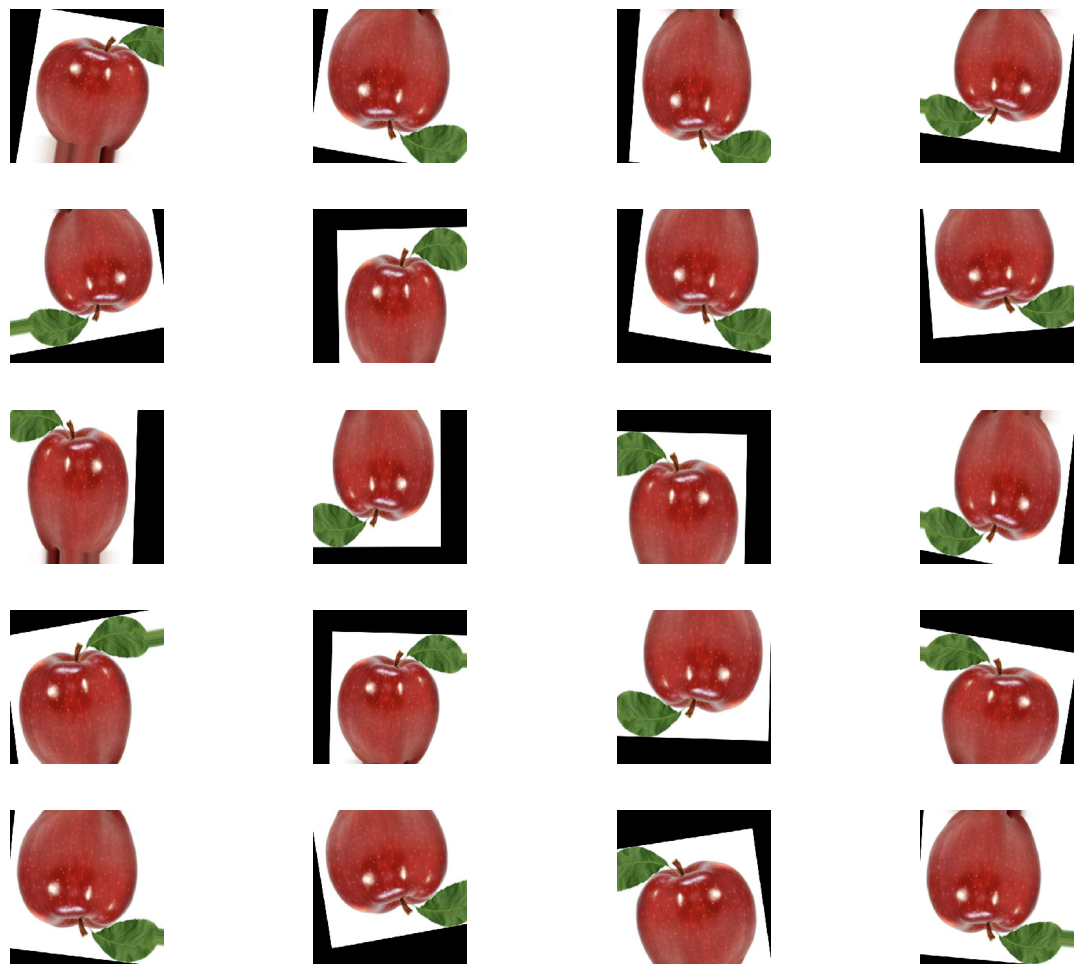

In [ ]:
path_aug = os.path.join(train_fresh_apples_dir, os.listdir(train_fresh_apples_dir)[-1])
img_augmentation = image.load_img(path_aug)
x_aug = image.img_to_array(img_augmentation)
x_aug = x_aug.reshape((1,) + x_aug.shape)

i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='fruit', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

preview_img = os.listdir(preview_dir)

plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
  plt.subplot((len(preview_img)//4) + 1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(os.path.join(preview_dir, preview_img[n]),
                            color_mode="rgb",
                            target_size=(224, 224),
                            interpolation="nearest"))
  plt.axis('off')
plt.show()

for fn in preview_img:
  os.system(f'rm {os.path.join(preview_dir, fn)}')

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    # shuffle = False,
                                                    target_size=(224,224), #?
                                                    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         # shuffle = False,
                                                         target_size=(224,224), #?
                                                         class_mode='categorical')

Found 8154 images belonging to 20 classes.
Found 4000 images belonging to 20 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      print("\nReached 95% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
#if you want to use tranfer learning, skip this cell
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [ ]:
train_len = 0
for foldername in os.listdir('/tmp/fvm-dataset/train'):
    train_len = train_len + len(os.listdir(os.path.join('/tmp/fvm-dataset/train',foldername)))
    
val_len = 0
for foldername in os.listdir('/tmp/fvm-dataset/val'):
    val_len = val_len + len(os.listdir(os.path.join('/tmp/fvm-dataset/val',foldername)))

print(train_len)
print(val_len)

8155
4001


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=int(train_len/32),
    epochs=30,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=int(val_len/32)
)

Epoch 1/30
 77/254 [========>.....................] - ETA: 16:16 - loss: 2.2653 - accuracy: 0.3239

<Figure size 640x480 with 0 Axes>

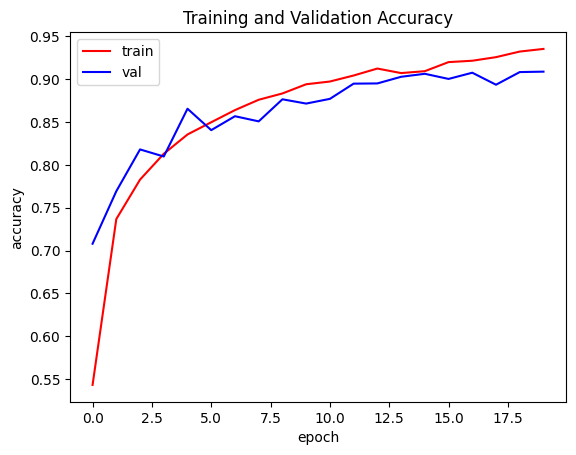

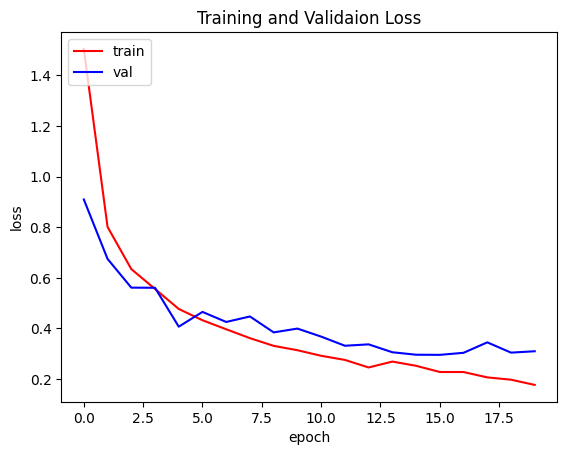

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(224, 224),
                                                  shuffle = False,
                                                  class_mode='categorical')

filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)

In [ ]:
model.save('model.h5')

In [ ]:
from keras.utils import get_file
import pathlib
import cv2

model_predict = tf.keras.models.load_model('model.h5')
model_predict.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(224, 224), interpolation="nearest")
  # imgplot = plt.imshow(img)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model_predict.predict(images, batch_size=10)

  max = np.amax(classes[0])
  if np.where(classes[0] == max)[0] == 0:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Apples')
  elif np.where(classes[0] == max)[0] == 1:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Bananas')
  elif np.where(classes[0] == max)[0] == 2:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Bellpepper')
  elif np.where(classes[0] == max)[0] == 3:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Cucumber')
  elif np.where(classes[0] == max)[0] == 4:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Mango')
  elif np.where(classes[0] == max)[0] == 5:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Meat')
  elif np.where(classes[0] == max)[0] == 6:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Orange')
  elif np.where(classes[0] == max)[0] == 7:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Potato')
  elif np.where(classes[0] == max)[0] == 8:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Strawberry')
  elif np.where(classes[0] == max)[0] == 9:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Tomato')
  elif np.where(classes[0] == max)[0] == 10:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Apples')
  elif np.where(classes[0] == max)[0] == 11:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Bananas')
  elif np.where(classes[0] == max)[0] == 12:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Bellpepper')
  elif np.where(classes[0] == max)[0] == 13:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Cucumber')
  elif np.where(classes[0] == max)[0] == 14:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Mango')
  elif np.where(classes[0] == max)[0] == 15:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Meat')
  elif np.where(classes[0] == max)[0] == 16:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Orange')
  elif np.where(classes[0] == max)[0] == 17:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Potato')
  elif np.where(classes[0] == max)[0] == 18:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Strawberry')
  else:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Tomato')

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot((len(image_name)//4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(224, 224), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  plt.title(title, color='black')
  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')

OSError: ignored

In [ ]:
import tensorflow as tf
import os 

# convert keras model to tflite 
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [ ]:
from keras.models import load_model
model = load_model('/content/model.h5')

TF_LITE_MODEL_FILE_NAME = "tflite_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# or using another method

# Save the model.
with open('tflite_model_another.tflite', 'wb') as f:
  f.write(tflite_model)

KeyError: ignored

In [ ]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])